In [565]:
%pylab inline
import pandas as pd
import seaborn as sns
df=pd.read_csv(r"C:\Users\rithu\Downloads\lendingclub_sample.csv")

Populating the interactive namespace from numpy and matplotlib


In [566]:
df.head()

,id,member_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,...,pub_rec,open_acc,total_acc,acc_now_delinq,tot_coll_amt,revol_bal,revol_util,total_credit_rv,tot_cur_bal,int_rate
0,55441634,59043359.0,18000.0,60 months,driver/wharehouseman,10+ years,MORTGAGE,68000.0,Source Verified,medical,...,1.0,15.0,19.0,0.0,0.0,13266.0,64.4%,20600.0,253482.0,17.86%
1,38595688,41379463.0,18000.0,60 months,Supervisor,3 years,MORTGAGE,58000.0,Source Verified,debt_consolidation,...,1.0,16.0,32.0,0.0,0.0,18703.0,58.1%,32200.0,159046.0,16.49%
2,38455988,41249804.0,16000.0,36 months,Mail Clerk,9 years,OWN,49000.0,Not Verified,credit_card,...,0.0,11.0,14.0,0.0,0.0,14864.0,91.2%,16300.0,155379.0,12.69%
3,40362356,43227157.0,4000.0,36 months,MANAGER INTERMODAL OPERATIONS,10+ years,RENT,85000.0,Source Verified,debt_consolidation,...,2.0,15.0,55.0,0.0,0.0,6912.0,55.3%,12500.0,68231.0,12.39%
4,54207722,57748458.0,6000.0,36 months,Management,10+ years,MORTGAGE,75000.0,Not Verified,debt_consolidation,...,0.0,9.0,27.0,0.0,0.0,12104.0,76.6%,15800.0,253166.0,7.89%


# Exercise a

Q.Analyze and describe the distribution of interest rates in the data set.

Text(0.5,1,'Comparison of interest rates using standard normal distribution')

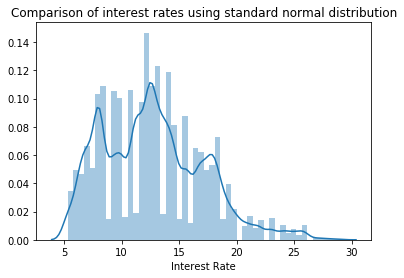

In [567]:
#the below code is a bar plot to show how the rate of interest in distributed
df['int_rate']=df['int_rate'].apply(lambda x:x.replace("%",""))
df['int_rate']=df['int_rate'].apply(lambda x:float(x))
sns.distplot(df['int_rate'])
plt.xlabel("Interest Rate")
plt.title('Comparison of interest rates using standard normal distribution')

## Analysis:

The distribution plot above shows that the interest rate with higher frequency are between 10% to 15% and drops drastically from 17% to 30%.
We can also notice that the number of people increase between the interst rate of 5% to around 7% but decrease between 7% to 10% and again increases after 10%.

This distribution tells us that maximum number of people pay an interest rate between 5% to 20% on their loan amount.

# Exercise b

Q. The term of a loan is one of its most important characteristics, and has a significant impact on the payments and the interest associated with the loan. Analyze the relationship between the term and both the interest rate of the loans and the loan amount, and describe your results.

In [568]:
#the below code is a bar plot to clean the term column
df["term"]=df["term"].apply(lambda x:x.replace(" months",""))

Text(0.5,1,'Relationship between interest and number of people based on term')

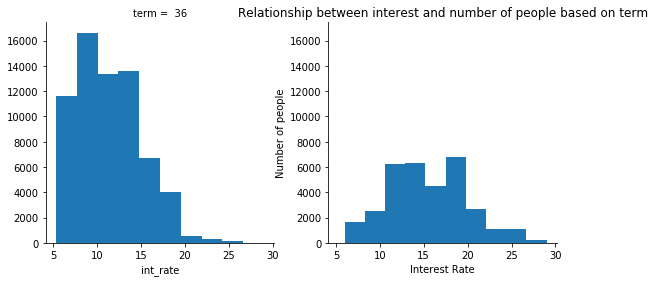

In [569]:
#the below code is a bar plot to show the relationship between interest rate and number of people based on term
g = sns.FacetGrid(df, col='term', sharex=True, size=4)
g.map(plt.hist, 'int_rate');
plt.xlabel("Interest Rate")
plt.ylabel("Number of people")
plt.title('Relationship between interest and number of people based on term',loc="center")

## Analysis:

The above FacetGrid plot shows how the interest rates vary for a term of 36 months and 60 months respectively.

Term 36 months: It is seen that maximum number of people who take a loan for 36 months pay an interest of 8% to 10% that is over 16,000 people. And around 24,000 people pay an interest of 10% to 15% and 10000 people pay an interest of 5% to 8%.People who pay an interest rate above 15% are around 10,000.

Term 60 months: it is observed that maximum number of people who take a loan of 60 months pay an interest of 10% to 20%. Though the number of people are in same range from 10% to 20%, they drop by 2000 from 15% to 18%.

In conclusion, people with loan term of 36 months who pay low interest rate are more in number.

Text(0.5,1,'Relationship between loan amount and number of people based on term')

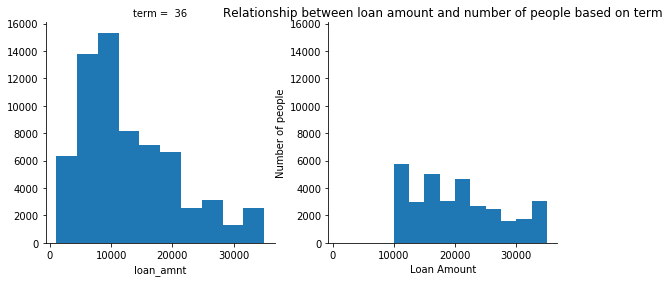

In [570]:
#the below code is a bar plot to show the relationship between laon amount and number of people based on term
g = sns.FacetGrid(df, col='term', sharex=True, size=4) 
g.map(plt.hist, 'loan_amnt');
plt.xlabel("Loan Amount")
plt.ylabel("Number of people")
plt.title('Relationship between loan amount and number of people based on term')

## Analysis:

Term of 36 months: The above plot shows that people take a loan amount of \$5,000 to \$10000 for a term of 36 months are very high than people who take a loan amount more than \$10,000. The number drops to half from $10,000 and decreased as the laon amount increases. 

Term of 60 months: The above plot shows that people who acquire a loan for a term of 60 months take a minimum of \$10,000 as loan amount and the number of people are high for loan amount of \$10,000, \$15,000 and \$20,0000. The other loan amounts are taken by fewer people.

In conclusion from the two graphs, we can understand that people mostly take a loan amount of \$5000-\$10000 for a term of 36 months and pay an interest of 8-10%

# Exercise c

Q. Analyze the purpose of the loans in the sample. Specifically, provide a summary of the frequency of the purposes, and then analyze the relationship between the purpose of the loan and (separately) the interest rate and the loan amount. Be sure to describe your analysis in addition to producing quantitative and/or visual results.

                        0
787                   car
23878         credit_card
60108  debt_consolidation
5905     home_improvement
348                 house
1752       major_purchase
842               medical
608                moving
4343                other
54       renewable_energy
792        small_business
581              vacation
1                 wedding


Text(0.5,1,'Relationship between purpose and frequency of the purposes')

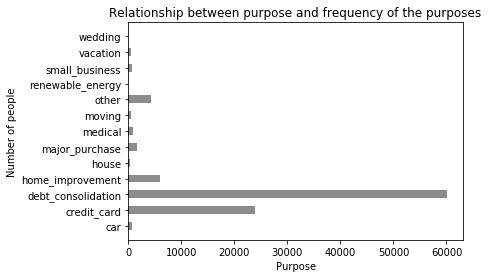

In [571]:
##the below code is a bar plot to show the relationship between purpose and frequency of the purposes
grouped=df.groupby(by=df["purpose"])
name=[]
group=[]
for n,g in grouped:
    name.append(n)
    group.append(len(g))
d=pd.DataFrame(name,group)
print(d)
plt.barh(y=name, width=group, height=0.5, color='0.55')
plt.xlabel("Purpose")
plt.ylabel("Number of people")
plt.title('Relationship between purpose and frequency of the purposes')

## Analysis:

The above plot shows the number of people who take loan for each purpose.
We can conclude that the main purpose around 60,000 people take loan for, is debt consolidation. Besides this around 25,000 people take loan for credit card purpose. People who take loans for other purposes are very few in number.

Text(0.5,1,'Relationship between purpose and loan amount')

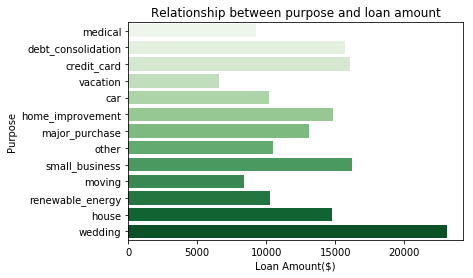

In [572]:
#the below code is a bar plot to show the relationship between purpose and laon amount
sns.barplot(x='loan_amnt', y='purpose', data=df, palette='Greens', ci=None, estimator=mean)
plt.xlabel("Loan Amount($)")
plt.ylabel("Purpose")
plt.title('Relationship between purpose and loan amount')

## Analysis:

The bar plot above depicts the relation between the purpose of the loan and the average loan amount.

This plot concludes that people take an average of over \$20,000 as loan for their wedding which is the highest compared to other purposes.

People who take a loan amount of approximately \$15,000 is for debt consolidation, credit card, home improvement, small business and house.

People take a loan amount of below \$10,000 for medical, vaction, car, major purchase, moving, renewable energy and other.

Text(0.5,1,'Relationship between Purpose and Interest Rate')

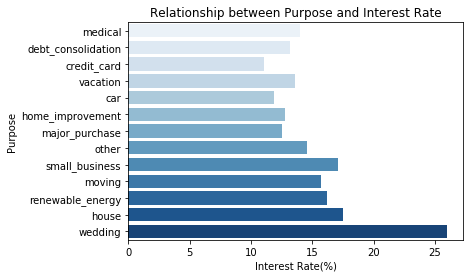

In [573]:
#the below code is a bar plot to show the relationship between purpose and interest rate
sns.barplot(x='int_rate', y='purpose', data=df, palette='Blues', ci=None, estimator=mean).legend(frameon=True, title='Bathrooms')
plt.xlabel("Interest Rate(%)")
plt.ylabel("Purpose")
plt.title('Relationship between Purpose and Interest Rate')

## Analysis:

The above plot shows the rate of interest for the loan for each purpose.

It is observed that wedding has the highest rate of interest of 25% on the loan as compared to other purposes.

All the other purposes have interest rate ranging from 10-17% with credit card having the least interest rate.

# Exercise d

Q Calculate the length of credit history (i.e., time in years since the earliest credit line was opened and the date of the data - Sept. 30, 2015) for the borrowers in the sample, and summarize and describe the distribution. Then, analyze and describe the relationship between the length of credit history and interest rates.

In [574]:
#this is to parse date
from dateutil.parser import parse
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x: parse(x))

In [575]:
df["earliest_cr_line"].head()
end="Sept, 30 2015"
end=parse(end)

In [576]:
df["earliest_cr_line"].min()

Timestamp('1950-08-19 00:00:00')

In [577]:
#have not considered leap years for this
#the below code calculates the length of credit history from the given date
df["length"]=df["earliest_cr_line"].apply(lambda x: (end-x)/365)

In [578]:
df["length"]=df["length"].apply(lambda x: str(x))
df["length"]=df["length"].apply(lambda x: float(x[0:2]))
df["length"].head()
#the below output is the length of credit history in years

0    15.0
1    17.0
2    12.0
3    22.0
4    23.0
Name: length, dtype: float64

In [580]:
#the below code puts the length of credit history into bins of size 5
df.insert(4, 'length1', pd.cut(df['length'], np.arange(0,70,5)))
df['length1'].value_counts().sort_index()

(0, 5]       3198
(5, 10]     16410
(10, 15]    33115
(15, 20]    22197
(20, 25]    12214
(25, 30]     7168
(30, 35]     3313
(35, 40]     1504
(40, 45]      574
(45, 50]      239
(50, 55]       52
(55, 60]       12
(60, 65]        3
Name: length1, dtype: int64

Text(0.5,1,'Relationship between length of credit history and the interest rate')

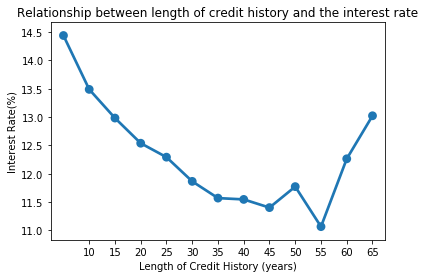

In [581]:
#the below plot depicts the length of credit history and the interest rate change accordingly
sns.pointplot(x="length1", y="int_rate", data=df, join=True, ci=None, estimator = mean)
plt.ylabel("Interest Rate(%)")
plt.xlabel("Length of Credit History (years)")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['10','15','20','25','30','35','40','45','50','55','60','65','70'])
plt.title('Relationship between length of credit history and the interest rate')

## Analysis:

The above pointplot shows that interest rate is very high with lesser years of credit history. As the number of years increases the rate of interest decreases drastically upto 45 years from 14.5% to 11.5% and then increases upto 50 years to 12% and again drops to 11% till 55 years. After 55 years it increases to 13%.

This shows that interest rate decreases as the length of credit history increases upto 45 years of age.

# Exercise e

Q Analyze the relationship between debt and interest rate, selecting one or more appropriate variables to perform your analysis. As for other parts of the assignments, be sure to describe your analysis in addition to producing quantitative and/or visual results.

In [582]:
#the below code converts the loan amount into bins of size 2000
df.insert(4, 'loan_amnt2', pd.cut(df['loan_amnt'], np.arange(0,35000,2000)))
df['loan_amnt2'].value_counts().sort_index()

(0, 2000]          1398
(2000, 4000]       4483
(4000, 6000]       8931
(6000, 8000]       8697
(8000, 10000]     11724
(10000, 12000]    10245
(12000, 14000]     5332
(14000, 16000]    11144
(16000, 18000]     5404
(18000, 20000]     8181
(20000, 22000]     3564
(22000, 24000]     4536
(24000, 26000]     4190
(26000, 28000]     2968
(28000, 30000]     2932
(30000, 32000]      793
(32000, 34000]      595
Name: loan_amnt2, dtype: int64

Text(0.5,1,'Relationship between interest rate and loan amount for specific terms')

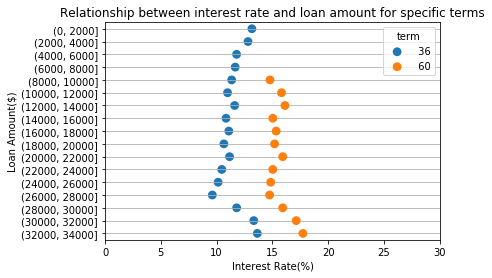

In [583]:
#plotting the interest rate and loan amount for specific terms
sns.pointplot(x='int_rate', y='loan_amnt2',hue='term', data=df, join=False, ci=None, estimator=mean)
plt.grid(b=True, axis='y')
plt.xlabel("Interest Rate(%)")
plt.ylabel("Loan Amount($)")
plt.xlim([0,30]);
plt.title('Relationship between interest rate and loan amount for specific terms')

## Analysis:

Here I have used a point plot to show how the rate of interest varies for loan amount (that is the debt taken by a person) taken  for a particular term.

The plot shows that on average the interest rate for the the loan amount of \$8,000 to \$34,000 taken for a term of 60 months has a higher rate of interest between 15% to 20%.
While on average the interest rate for the the loan amount of \$2,000 to \$34,000 taken for a term of 36 months has a lower rate of interest between 10% to 15%.

In conclusion we can say that there is a clear distinction that for term of 60 months the rate of interest is higher than for a term of 36 months